# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

By adapting your Genetic Algorithm (GA) code, developed during the Numerical Exercise 9, write a C++ code to solve the TSP with a **Simulated Annealing** (SA) algorithm. Apply your code to the optimization of a path among 

- 32 cities randomly placed on a circumference
- 32 cities randomly placed inside a square

Show your results via:

- a picture of the length of the best path as a function of the iteration of your algorithm
- a picture of the best path

and compare your SA results with those obtained with GA in the previosu numerical exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random cities on a Circumference

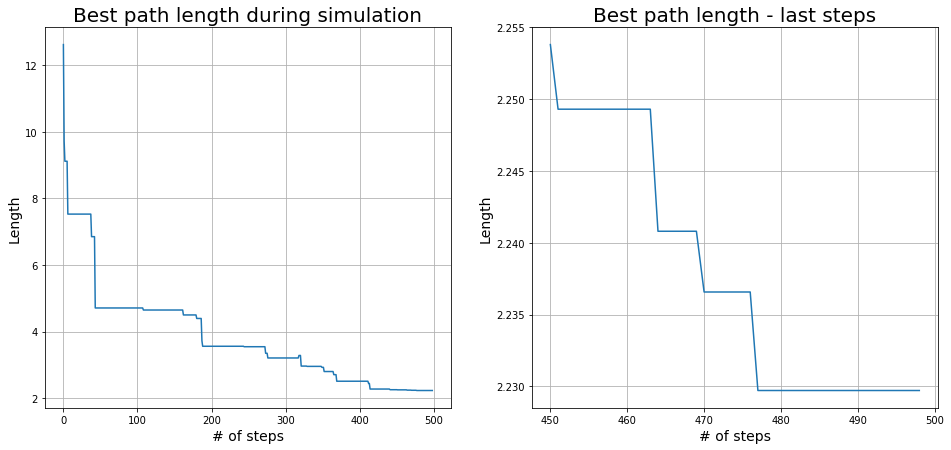

In [2]:
Best = np.loadtxt('es10.1.circle/out.best.paths')

x = np.arange(len(Best))

fig = plt.figure(figsize = (16,7))
ax1 = fig.add_subplot(121)
ax1.plot(x,Best)
ax1.grid()
ax1.set_title('Best path length during simulation',fontsize = 20)
ax1.set_xlabel('# of steps',fontsize = 14)
ax1.set_ylabel('Length',fontsize = 14)

Best_short = []
for i in range(450,len(Best)):
    Best_short.append(Best[i])
Best_short = np.asarray(Best_short)

x_short = np.arange(450,len(Best))

ax = fig.add_subplot(122)
ax.plot(x_short,Best_short)
ax.grid()
ax.set_title('Best path length - last steps',fontsize = 20)
ax.set_xlabel('# of steps',fontsize = 14)
ax.set_ylabel('Length',fontsize = 14)


plt.show()

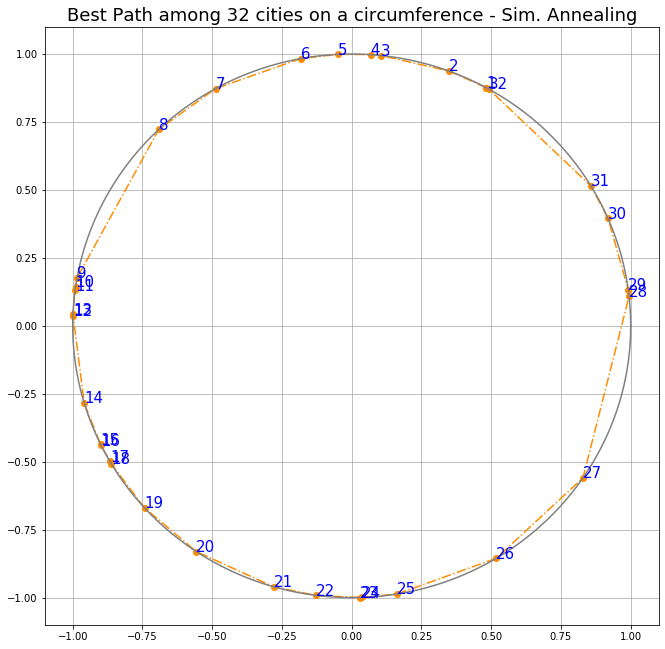

In [3]:
Path = np.loadtxt('es10.1.circle/out.path.final')

Xplot = [elem[0] for elem in Path ]
Yplot = [elem[1] for elem in Path ]
Xplot.append(Path[0][0])
Yplot.append(Path[0][1])
Xplot = np.asarray(Xplot)#close the loop
Yplot = np.asarray(Yplot)#

theta = np.linspace(0,2*np.pi,200)
R = 1
CircX = R*np.cos(theta)
CircY = R*np.sin(theta)




fig = plt.figure(figsize=(11,11))

ax = fig.add_subplot(111)

ax.plot(Xplot,Yplot,'o-.',color = 'darkorange')

ax.plot(CircX,CircY,'-',color = 'grey')

for i in range(len(Xplot)-1):
    ax.annotate(str(i+1),(Xplot[i],Yplot[i]),fontsize = 15,color = 'blue')

ax.set_title('Best Path among 32 cities on a circumference - Sim. Annealing',fontsize = 18)
    
plt.grid()
plt.show()

**N.B.<br> comparison with GA seemed pointless here, the best path is obviously the ordered one on the circumference**

# Random cities in a square

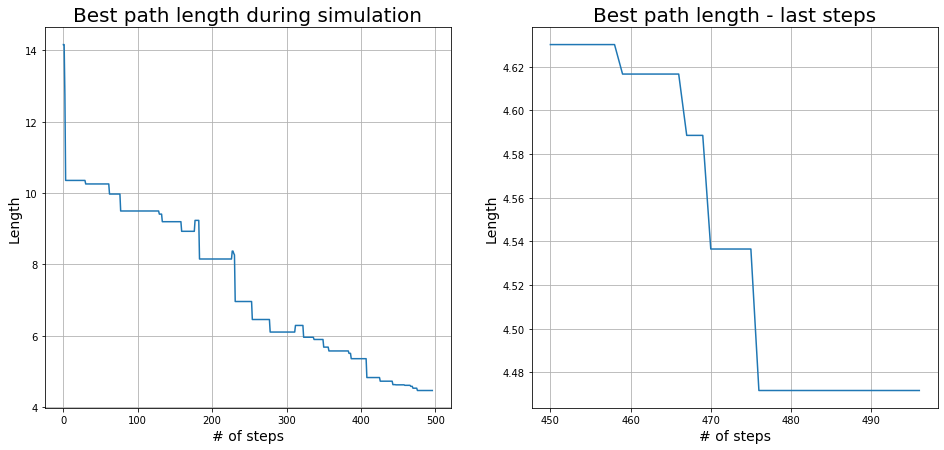

In [4]:
Best = np.loadtxt('es10.1.rand/out.best.paths')

x = np.arange(len(Best))

fig = plt.figure(figsize = (16,7))
ax1 = fig.add_subplot(121)
ax1.plot(x,Best)
ax1.grid()
ax1.set_title('Best path length during simulation',fontsize = 20)
ax1.set_xlabel('# of steps',fontsize = 14)
ax1.set_ylabel('Length',fontsize = 14)

Best_short = []
for i in range(450,len(Best)):
    Best_short.append(Best[i])
Best_short = np.asarray(Best_short)

x_short = np.arange(450,len(Best))

ax = fig.add_subplot(122)
ax.plot(x_short,Best_short)
ax.grid()
ax.set_title('Best path length - last steps',fontsize = 20)
ax.set_xlabel('# of steps',fontsize = 14)
ax.set_ylabel('Length',fontsize = 14)


plt.show()

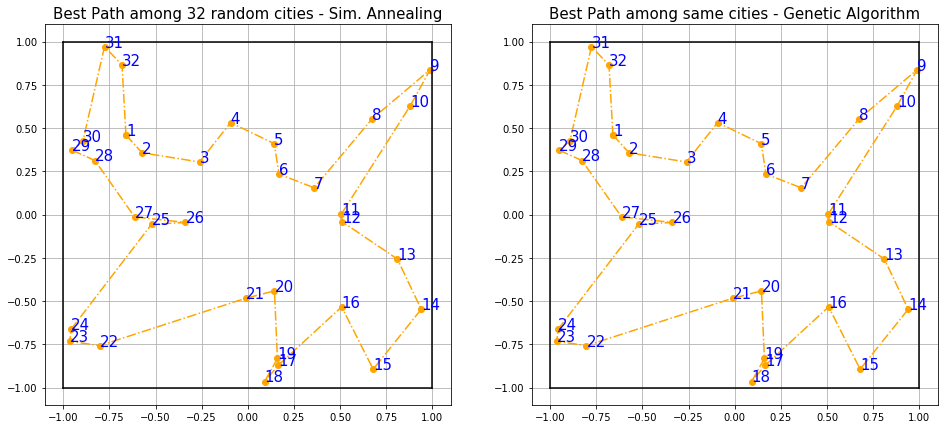

In [5]:
Path = np.loadtxt('es10.1.rand/out.path.final')

Xplot = [elem[0] for elem in Path ]
Yplot = [elem[1] for elem in Path ]
Xplot.append(Path[0][0])
Yplot.append(Path[0][1])
Xplot = np.asarray(Xplot)#close the loop
Yplot = np.asarray(Yplot)#

x = np.linspace(-1,1,200)
#R = 1
#CircX = R*np.cos(theta)
#CircY = R*np.sin(theta)

fig = plt.figure(figsize=(16,7))

ax1 = fig.add_subplot(121)

ax1.plot(Xplot,Yplot,'o-.',color='orange')

ax1.plot(x,np.ones(200),'k-')#add square border
ax1.plot(x,-1*np.ones(200),'k-')
ax1.plot(np.ones(200),x,'k-')
ax1.plot(-1*np.ones(200),x,'k-')

ax1.set_title('Best Path among 32 random cities - Sim. Annealing',fontsize = 15)


for i in range(len(Xplot)-1):
    ax1.annotate(str(i+1),(Xplot[i],Yplot[i]),fontsize = 15, color = 'blue')
ax1.grid()


Path_GA = np.loadtxt('../Week9/es9.rand/out.path.final')

Xplot_GA = [elem[0] for elem in Path ]
Yplot_GA = [elem[1] for elem in Path ]
Xplot_GA.append(Path[0][0])
Yplot_GA.append(Path[0][1])
Xplot_GA = np.asarray(Xplot_GA)#close the loop
Yplot_GA = np.asarray(Yplot_GA)#



ax2 = fig.add_subplot(122)

ax2.plot(Xplot,Yplot,'o-.',color='orange')

ax2.plot(x,np.ones(200),'k-')#add square border
ax2.plot(x,-1*np.ones(200),'k-')
ax2.plot(np.ones(200),x,'k-')
ax2.plot(-1*np.ones(200),x,'k-')

ax2.set_title('Best Path among same cities - Genetic Algorithm',fontsize = 15)

for i in range(len(Xplot_GA)-1):
    ax2.annotate(str(i+1),(Xplot_GA[i],Yplot_GA[i]),fontsize = 15, color = 'blue')
ax2.grid()

plt.show()

### As can be seen above, the two algorithms found the same best path, making it a really good candidate for the absolute best one.

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.

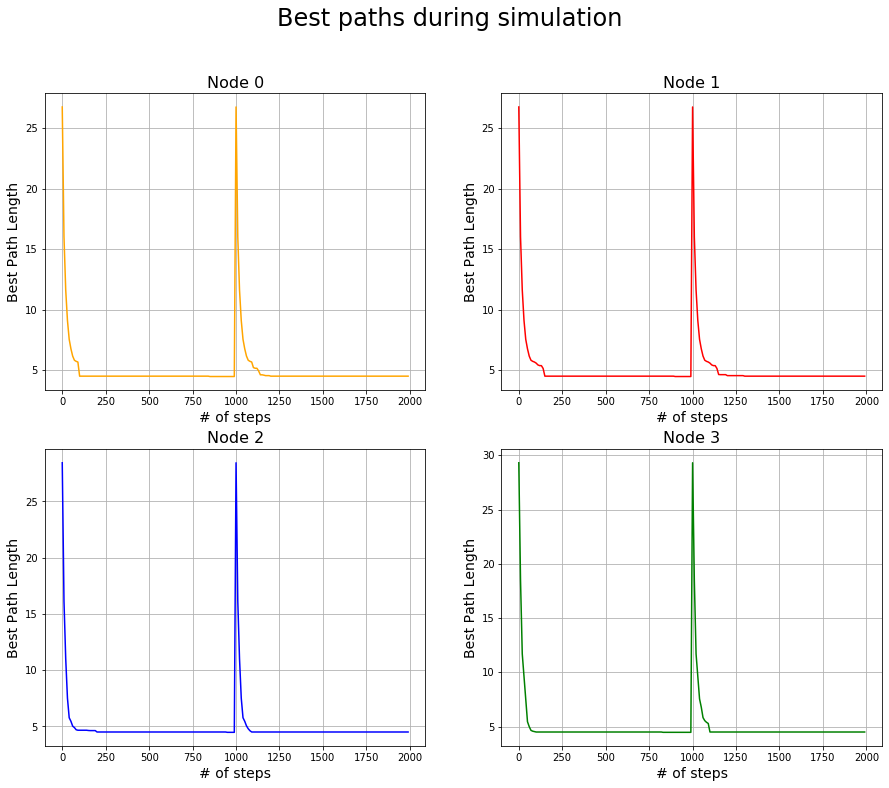

In [38]:
bestP = np.loadtxt("es10.2/out.best.paths.0")
fig = plt.figure(figsize = (15,12))
fig.suptitle("Best paths during simulation",fontsize = 24)

ax0 = fig.add_subplot(221)
ax0.plot(10*np.arange(len(bestP)),bestP,color = 'orange')
ax0.set_title("Node 0", fontsize = 16)
ax0.set_xlabel('# of steps',fontsize = 14)
ax0.set_ylabel('Best Path Length',fontsize = 14)
ax0.grid()

bestP = np.loadtxt("es10.2/out.best.paths.1")
ax1 = fig.add_subplot(222)
ax1.plot(10*np.arange(len(bestP)),bestP,color = 'red')
ax1.set_title("Node 1", fontsize = 16)
ax1.set_xlabel('# of steps',fontsize = 14)
ax1.set_ylabel('Best Path Length',fontsize = 14)
ax1.grid()

bestP = np.loadtxt("es10.2/out.best.paths.2")
ax2 = fig.add_subplot(223)
ax2.plot(10*np.arange(len(bestP)),bestP,color = 'blue')
ax2.set_title("Node 2", fontsize = 16)
ax2.set_xlabel('# of steps',fontsize = 14)
ax2.set_ylabel('Best Path Length',fontsize = 14)
ax2.grid()

bestP = np.loadtxt("es10.2/out.best.paths.3")
ax3 = fig.add_subplot(224)
ax3.plot(10*np.arange(len(bestP)),bestP,color = 'green')
ax3.set_title("Node 3", fontsize = 16)
ax3.set_xlabel('# of steps',fontsize = 14)
ax3.set_ylabel('Best Path Length',fontsize = 14)
ax3.grid()

**The cores eventually found the same best path. The larger 'jumps' correspond to the migrations when that best paths moved to other cores**

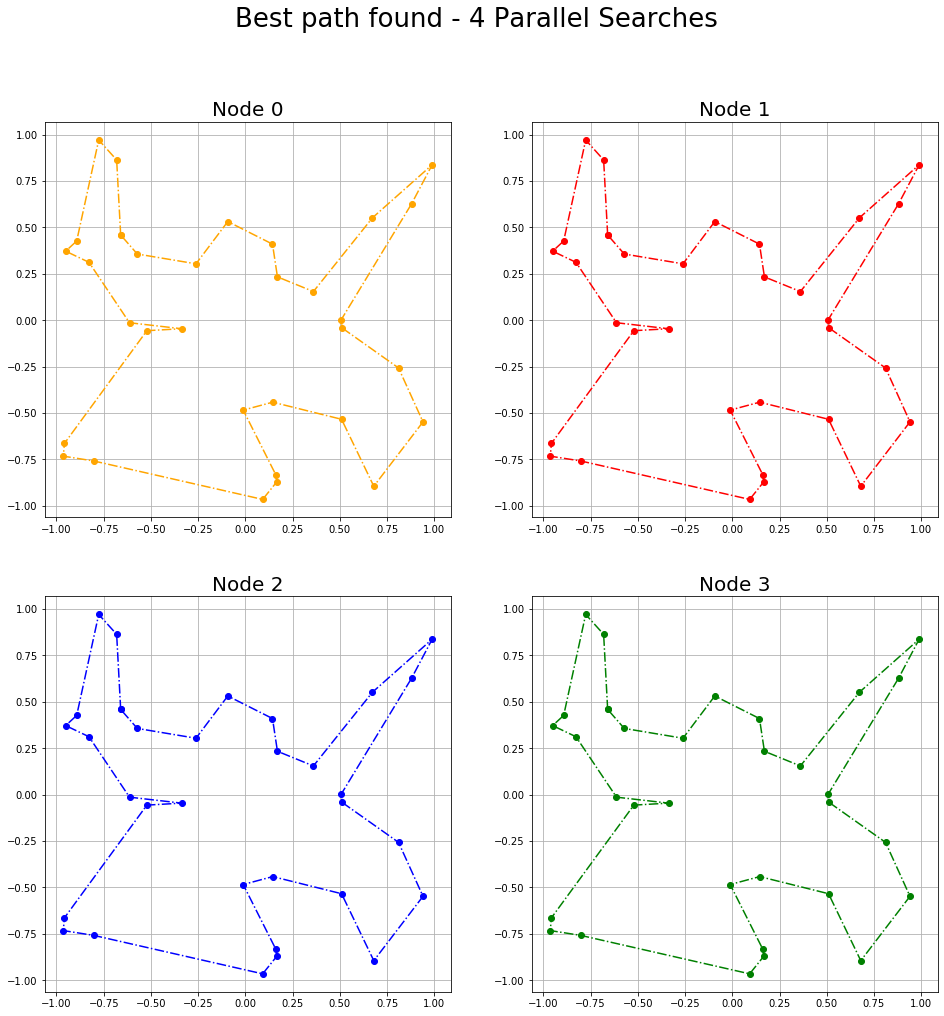

In [37]:
fig = plt.figure(figsize=(16,16))

fig.suptitle('Best path found - 4 Parallel Searches',fontsize = 26)

for n in range(4):

    Path = np.loadtxt('es10.2/out.path' + str(n) +'.final')
 
    if n==0:
        Xplot_0 = [elem[0] for elem in Path ]
        Yplot_0 = [elem[1] for elem in Path ]
        Xplot_0.append(Path[0][0])
        Yplot_0.append(Path[0][1])
        Xplot_0 = np.asarray(Xplot_0)#close the loop
        Yplot_0 = np.asarray(Yplot_0)#
        ax0 = fig.add_subplot(221)
        ax0.set_title('Node 0', fontsize = 20)
        ax0.plot(Xplot_0,Yplot_0,'o-.',color='orange')
        ax0.grid()
    if n==1:
        Xplot_1 = [elem[0] for elem in Path ]
        Yplot_1 = [elem[1] for elem in Path ]
        Xplot_1.append(Path[0][0])
        Yplot_1.append(Path[0][1])
        Xplot_1 = np.asarray(Xplot_1)#close the loop
        Yplot_1 = np.asarray(Yplot_1)#
        ax1 = fig.add_subplot(222)
        ax1.set_title('Node 1', fontsize = 20)
        ax1.plot(Xplot_1,Yplot_1,'o-.',color='red')
        ax1.grid()
    if n==2:
        Xplot_2 = [elem[0] for elem in Path ]
        Yplot_2 = [elem[1] for elem in Path ]
        Xplot_2.append(Path[0][0])
        Yplot_2.append(Path[0][1])
        Xplot_2 = np.asarray(Xplot_2)#close the loop
        Yplot_2 = np.asarray(Yplot_2)#
        ax2 = fig.add_subplot(223)
        ax2.set_title('Node 2', fontsize = 20)
        ax2.plot(Xplot_2,Yplot_2,'o-.',color='blue')
        ax2.grid()
    if n==3:
        Xplot_3 = [elem[0] for elem in Path ]
        Yplot_3 = [elem[1] for elem in Path ]
        Xplot_3.append(Path[0][0])
        Yplot_3.append(Path[0][1])
        Xplot_3 = np.asarray(Xplot_3)#close the loop
        Yplot_3 = np.asarray(Yplot_3)#
        ax3 = fig.add_subplot(224)
        ax3.set_title('Node 3', fontsize = 20)
        ax3.plot(Xplot_3,Yplot_3,'o-.',color='green')
        ax3.grid()
    